In [ ]:
# Mount Google Drive to this Notebook instance.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataFile = "./drive/My Drive/Datasets/TimeSeries/AirQualityUCI/AirQualityUCI.xlsx"
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
df = pd.read_excel(dataFile)


#check the dtypes
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [ ]:
df['Date_Time'] = df['Date'].astype(str) + ' '+ df['Time'].astype(str)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [ ]:
data = df.drop(['Date', 'Time'], axis=1)
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [ ]:
data.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Date_Time         object
dtype: object

In [ ]:
data['Date_Time'] = pd.to_datetime(data.Date_Time , format = '%Y-%m-%d %H:%M:%S')


In [ ]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [ ]:
data.dtypes

CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Date_Time        datetime64[ns]
dtype: object

In [ ]:
data.index = data.Date_Time

In [ ]:
data.index

DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='Date_Time', length=9357, freq=None)

In [ ]:
data2 = data.drop(['Date_Time'], axis=1)
data2.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
data2.index

DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='Date_Time', length=9357, freq=None)

In [ ]:
columns = data2.columns
columns = list(columns)
columns

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [ ]:
#print(data2[columns[0]].value_counts()[-200])
#print(len(data2[columns[0]]))
missing_percentages = []
for col in columns:
  a = data2[col].value_counts()[-200]
  b = len(data2[col])
  percentage = (a/b)*100
  missing_percentages.append(percentage)
print(missing_percentages)

[17.986534145559474, 3.9115100993908305, 90.23191193758683, 3.9115100993908305, 3.9115100993908305, 17.51629795874746, 3.9115100993908305, 17.54835951693919, 3.9115100993908305, 3.9115100993908305, 3.9115100993908305, 3.9115100993908305, 3.9115100993908305]


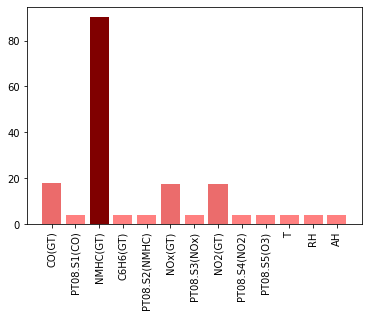

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
 
data = missing_percentages
 
# Colorize the graph based on likeability:
likeability_scores = np.array(data)
 
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)
 
 
# Plot a bar graph:
plt.bar(
    columns,
    data,
    align="center",
    color=color_map(data_normalizer(likeability_scores))
)
 
plt.xticks( columns, rotation='vertical')
plt.show()

In [ ]:
#missing value treatment
columns = data2.columns
for column in columns:
    for i in range(0,len(data2)):
       if data2[column][i] == -200:
           data2[column][i] = data2[column][i-1]

data3 = data2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


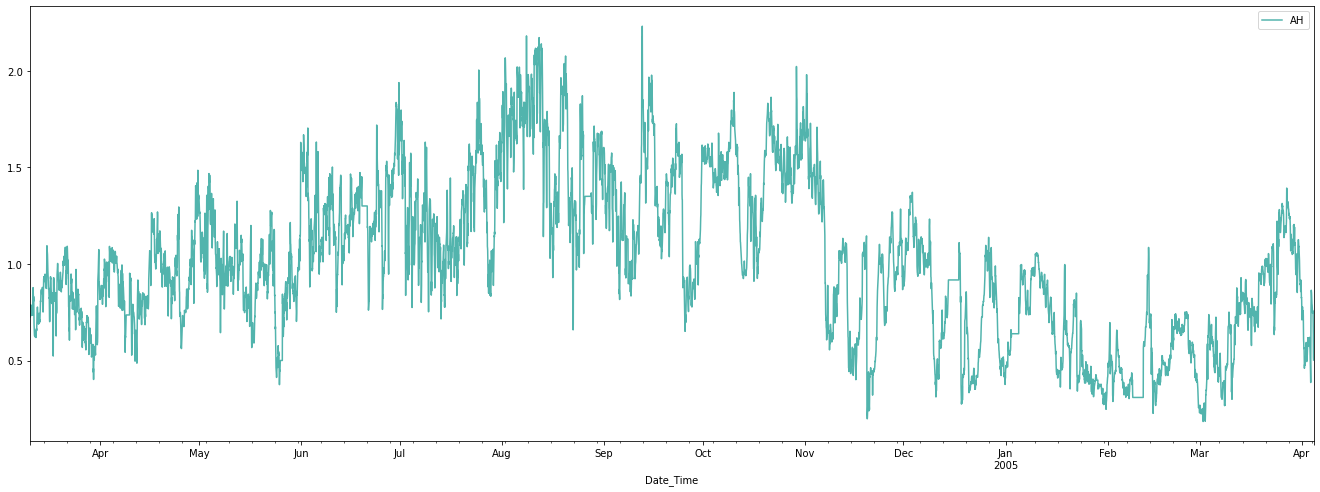

In [ ]:
def plot_air_particle(column_name):

  temp_df = data3[[column_name]]

  temp_df.plot(figsize=(23,8), color='#52b4ad')


plot_air_particle(columns[12])

In [ ]:

#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = data3.drop([ 'NMHC(GT)'], axis=1)
#coint_johansen(johan_test_temp,-1,1)
coint_johansen(johan_test_temp,-1,1).eig

array([1.65987935e-01, 1.48599607e-01, 1.07451132e-01, 9.54982171e-02,
       7.37901439e-02, 6.69655496e-02, 5.84686127e-02, 3.47465376e-02,
       3.26745213e-02, 1.25671346e-02, 2.50176176e-03, 7.21325803e-05])

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
import math
from sklearn.metrics import mean_squared_error
#creating the train and validation set
percentage = 0.8
train = data3[:int(percentage*(len(data3)))]
valid = data3[int(percentage*(len(data3))):]

#fit the model
model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [ ]:
type(prediction)
prediction.shape

(1872, 13)

In [ ]:
#df = pd.DataFrame(my_array, columns = ['Column_A','Column_B','Column_C'])
pred_df = pd.DataFrame(  prediction, index = valid.index,columns=columns)
pred_df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2005-01-16 15:00:00,0.888161,841.803964,271.644320,1.982632,595.965721,137.030660,1119.615156,87.815339,829.844660,546.026663,10.574386,34.871315,0.437278
2005-01-16 16:00:00,0.992424,866.262441,269.327633,2.332532,619.914837,158.117747,1098.381882,90.537193,856.405973,598.407982,9.854324,37.402547,0.442645
2005-01-16 17:00:00,1.104907,890.900736,267.743663,2.832077,645.634216,177.729196,1078.458430,93.115608,885.665916,648.974793,9.242719,39.624150,0.447398
2005-01-16 18:00:00,1.219987,914.919521,266.664032,3.407752,671.662218,195.906115,1059.928335,95.571670,915.647307,697.359008,8.722839,41.579793,0.451740
2005-01-16 19:00:00,1.333743,937.819088,265.921087,4.011249,697.061083,212.682873,1042.817739,97.910723,945.091670,743.269637,8.281647,43.304705,0.455804


In [ ]:
len(pred_df)

1872

In [ ]:
#check rmse
for i in columns:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred_df[[i]], valid[[i]])))

rmse value for CO(GT) is :  1.4086965424459976
rmse value for PT08.S1(CO) is :  205.91037633779612
rmse value for NMHC(GT) is :  6.6707414276725245
rmse value for C6H6(GT) is :  7.130304477785818
rmse value for PT08.S2(NMHC) is :  277.85628373092
rmse value for NOx(GT) is :  214.75793797684943
rmse value for PT08.S3(NOx) is :  244.96129928951413
rmse value for NO2(GT) is :  66.65226538128222
rmse value for PT08.S4(NO2) is :  490.0528665282073
rmse value for PT08.S5(O3) is :  446.50499189021343
rmse value for T is :  10.72242936124178
rmse value for RH is :  17.114848634833837
rmse value for AH is :  0.5216105887685423


In [ ]:
pred_df_cum = pred_df.cumsum(axis = 0)
valid_cum = valid.cumsum(axis = 0)


In [ ]:
new_col_names = []
for col in columns:
  new_col_name = col + '_pred'
  new_col_names.append(new_col_name)
new_col_names

['CO(GT)_pred',
 'PT08.S1(CO)_pred',
 'NMHC(GT)_pred',
 'C6H6(GT)_pred',
 'PT08.S2(NMHC)_pred',
 'NOx(GT)_pred',
 'PT08.S3(NOx)_pred',
 'NO2(GT)_pred',
 'PT08.S4(NO2)_pred',
 'PT08.S5(O3)_pred',
 'T_pred',
 'RH_pred',
 'AH_pred']

In [ ]:
pred_df_cum.columns = new_col_names
pred_df_cum.head()

,CO(GT)_pred,PT08.S1(CO)_pred,NMHC(GT)_pred,C6H6(GT)_pred,PT08.S2(NMHC)_pred,NOx(GT)_pred,PT08.S3(NOx)_pred,NO2(GT)_pred,PT08.S4(NO2)_pred,PT08.S5(O3)_pred,T_pred,RH_pred,AH_pred
Date_Time,,,,,,,,,,,,,
2005-01-16 15:00:00,0.888161,841.803964,271.644320,1.982632,595.965721,137.030660,1119.615156,87.815339,829.844660,546.026663,10.574386,34.871315,0.437278
2005-01-16 16:00:00,1.880585,1708.066406,540.971953,4.315164,1215.880558,295.148407,2217.997038,178.352532,1686.250633,1144.434645,20.428710,72.273862,0.879923
2005-01-16 17:00:00,2.985492,2598.967142,808.715616,7.147241,1861.514774,472.877604,3296.455468,271.468140,2571.916550,1793.409438,29.671429,111.898013,1.327321
2005-01-16 18:00:00,4.205479,3513.886663,1075.379649,10.554993,2533.176992,668.783719,4356.383804,367.039810,3487.563857,2490.768446,38.394268,153.477806,1.779061
2005-01-16 19:00:00,5.539223,4451.705751,1341.300736,14.566242,3230.238075,881.466592,5399.201542,464.950533,4432.655527,3234.038083,46.675915,196.782511,2.234864


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

<Figure size 432x288 with 0 Axes>

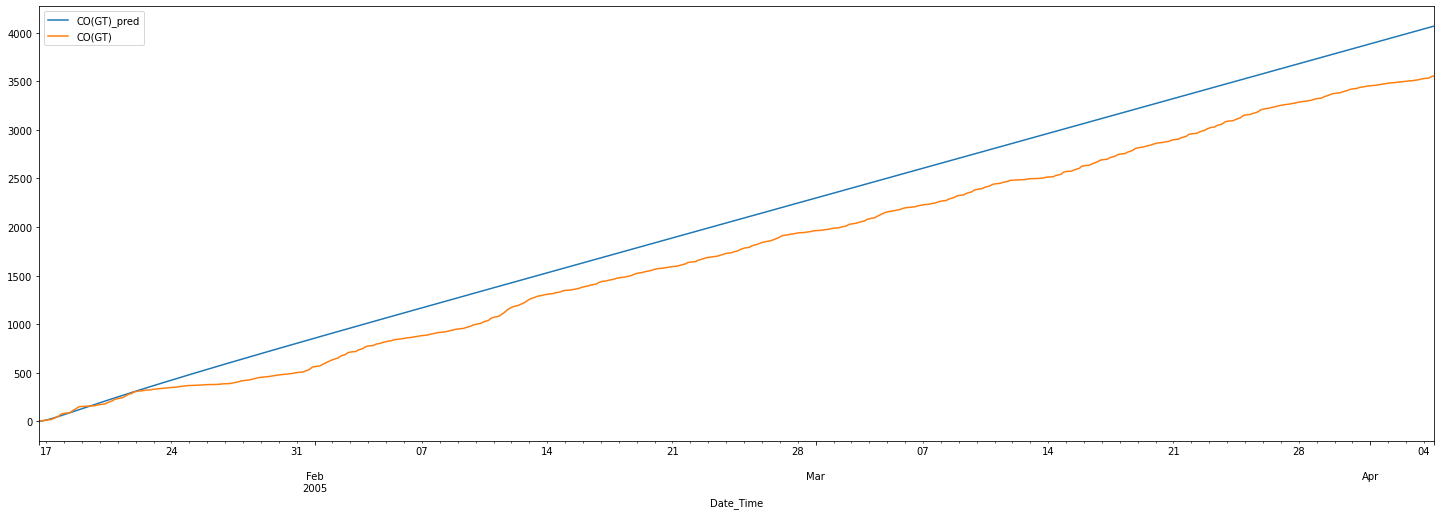

<Figure size 432x288 with 0 Axes>

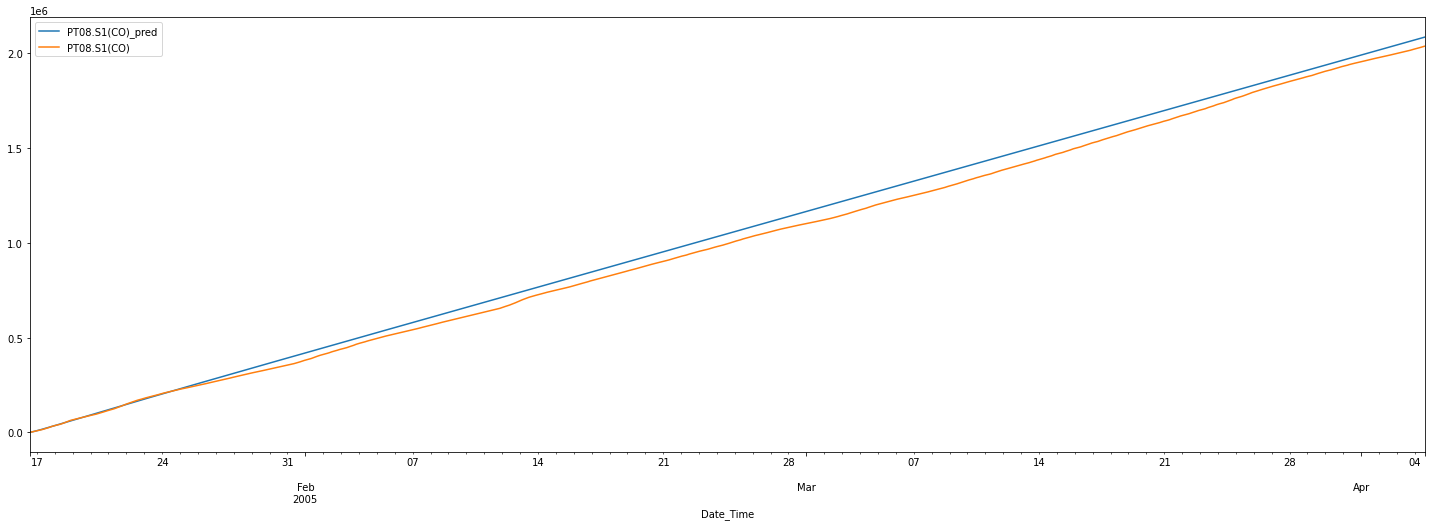

<Figure size 432x288 with 0 Axes>

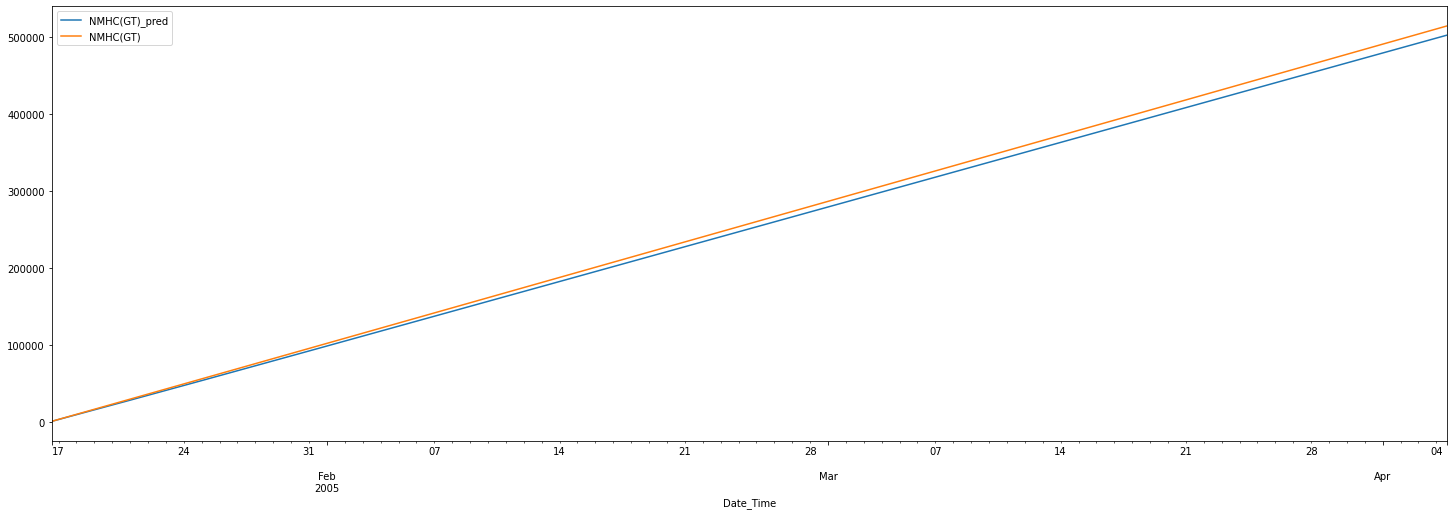

<Figure size 432x288 with 0 Axes>

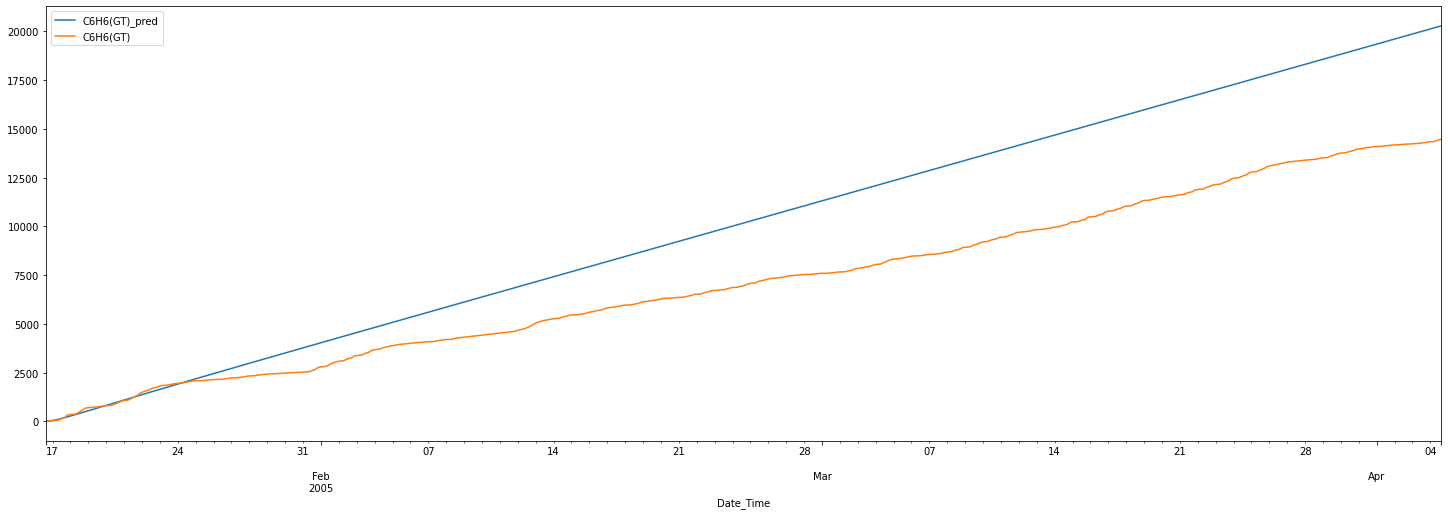

<Figure size 432x288 with 0 Axes>

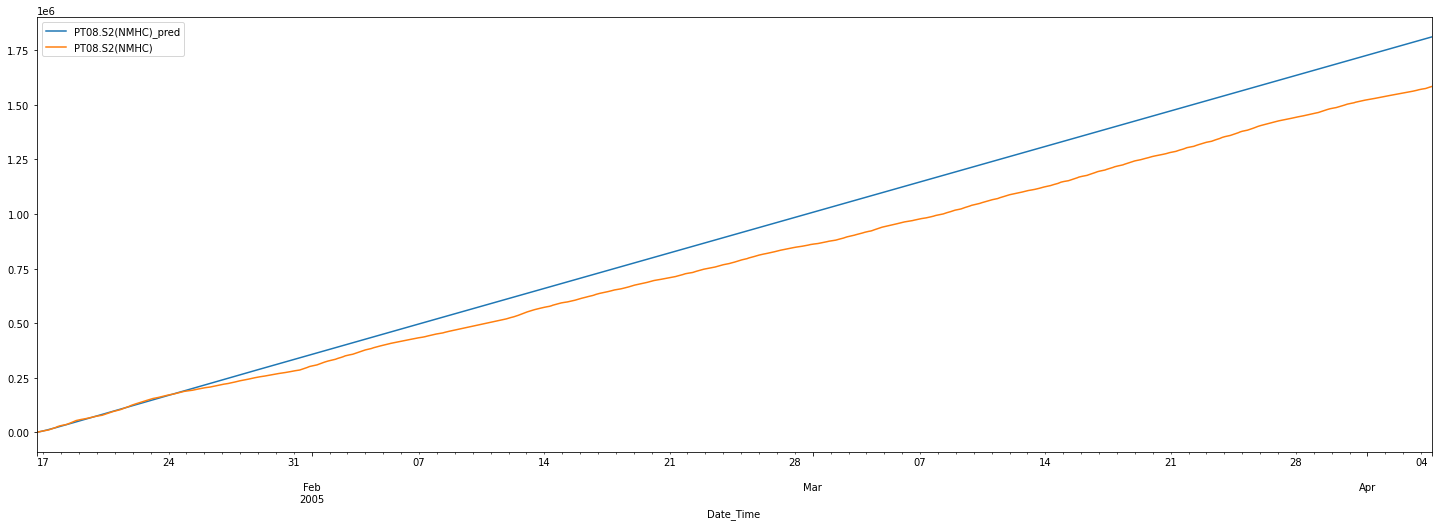

<Figure size 432x288 with 0 Axes>

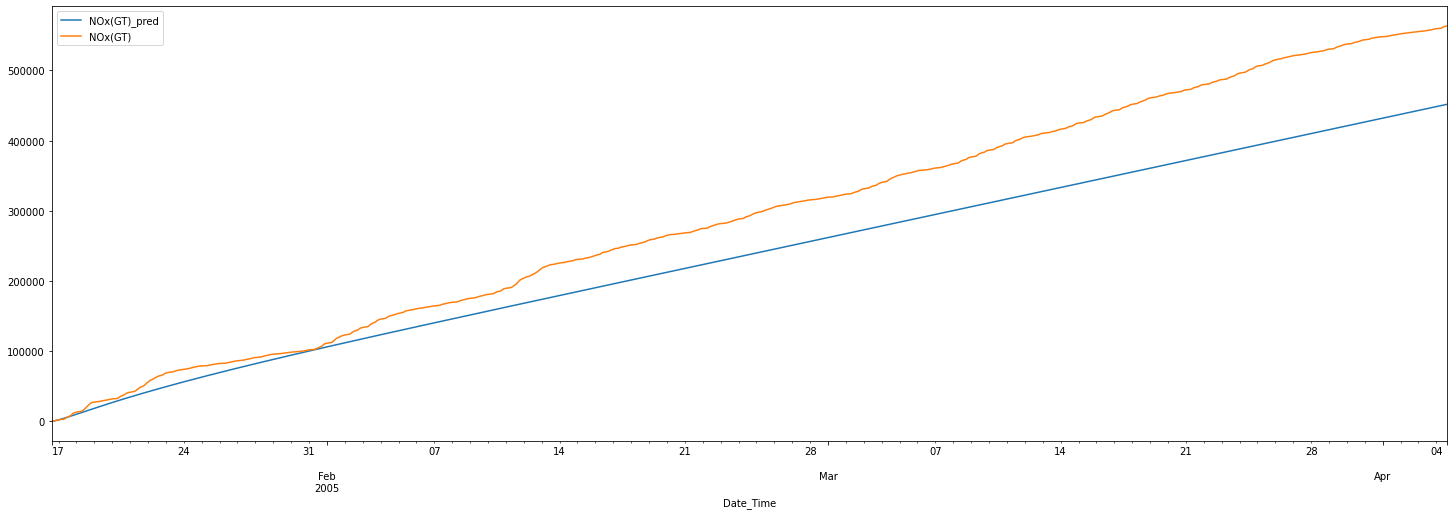

<Figure size 432x288 with 0 Axes>

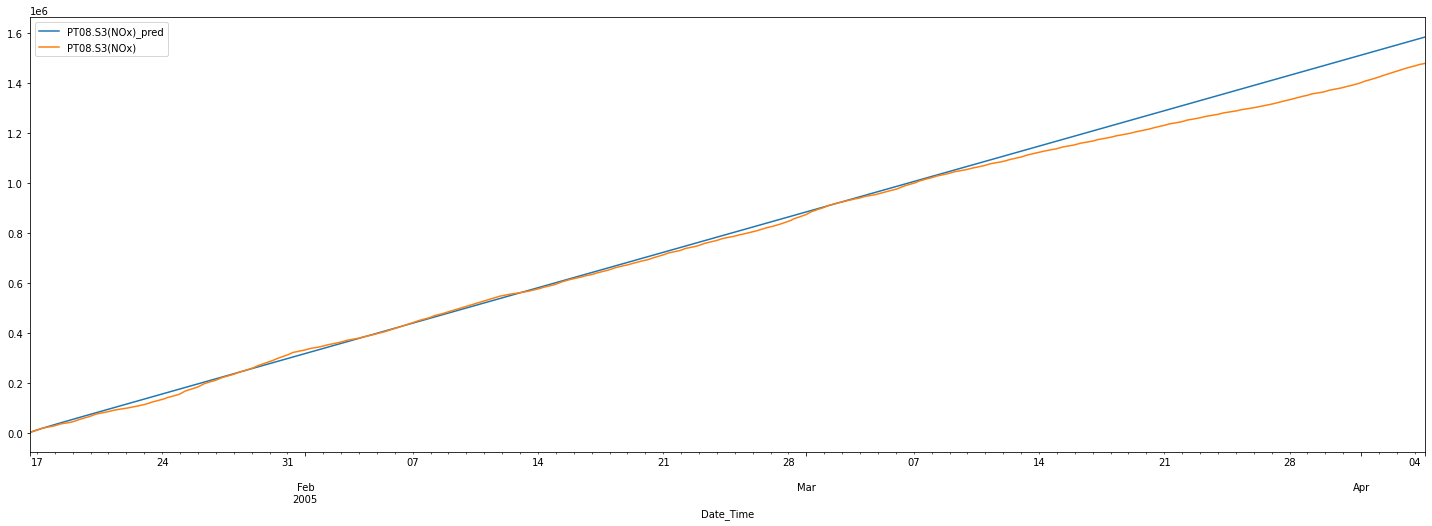

<Figure size 432x288 with 0 Axes>

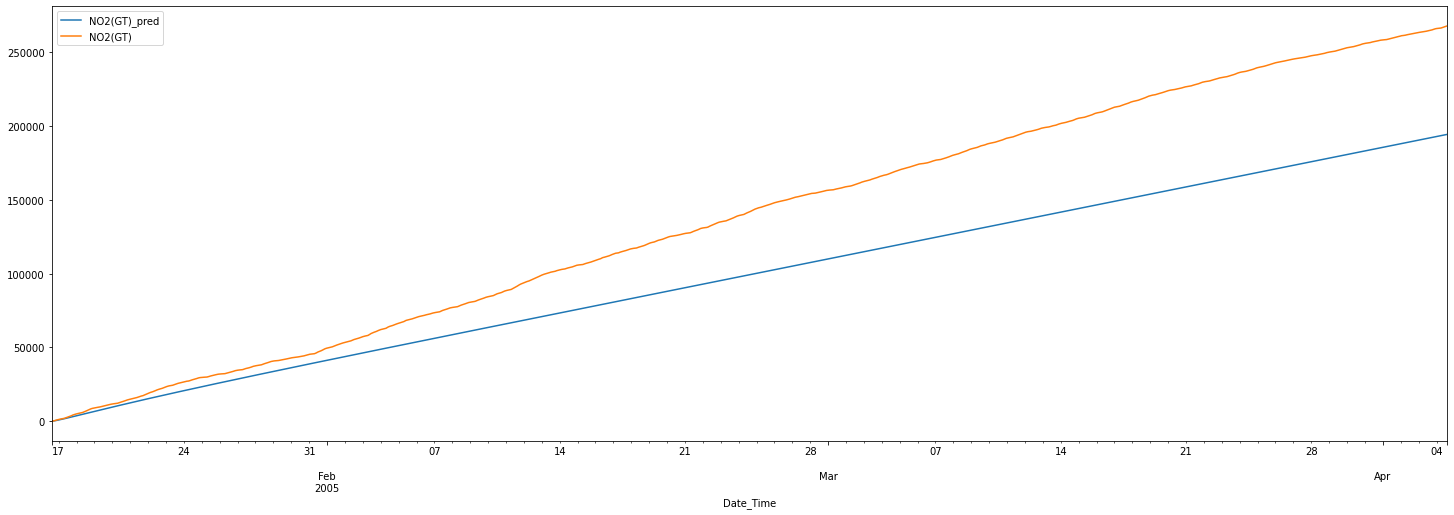

<Figure size 432x288 with 0 Axes>

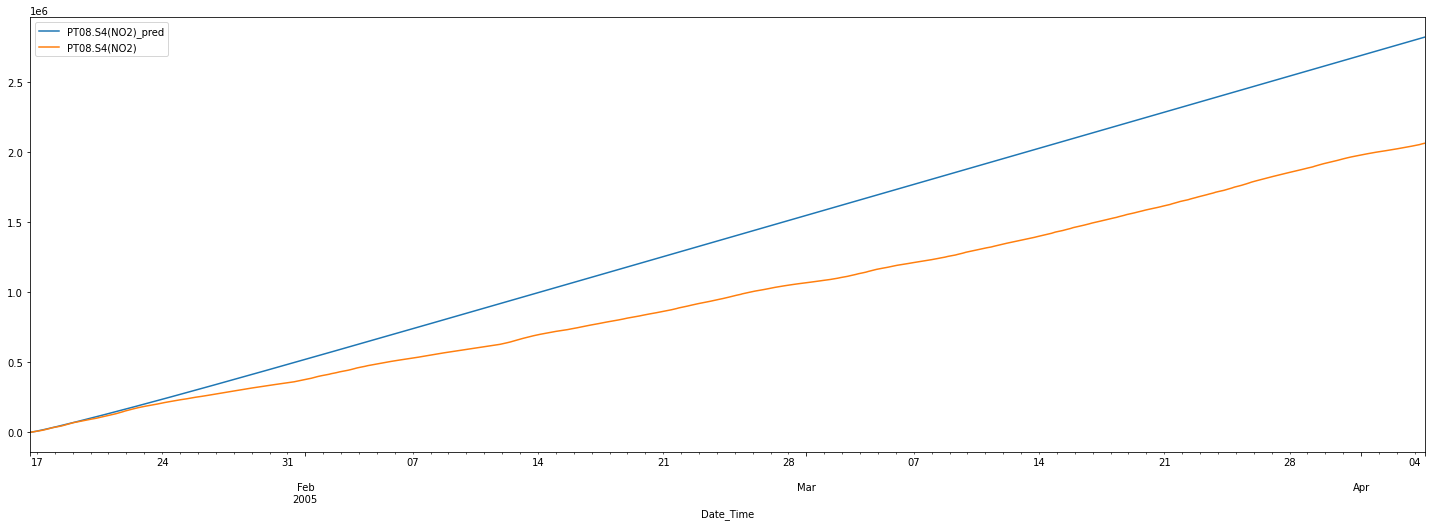

<Figure size 432x288 with 0 Axes>

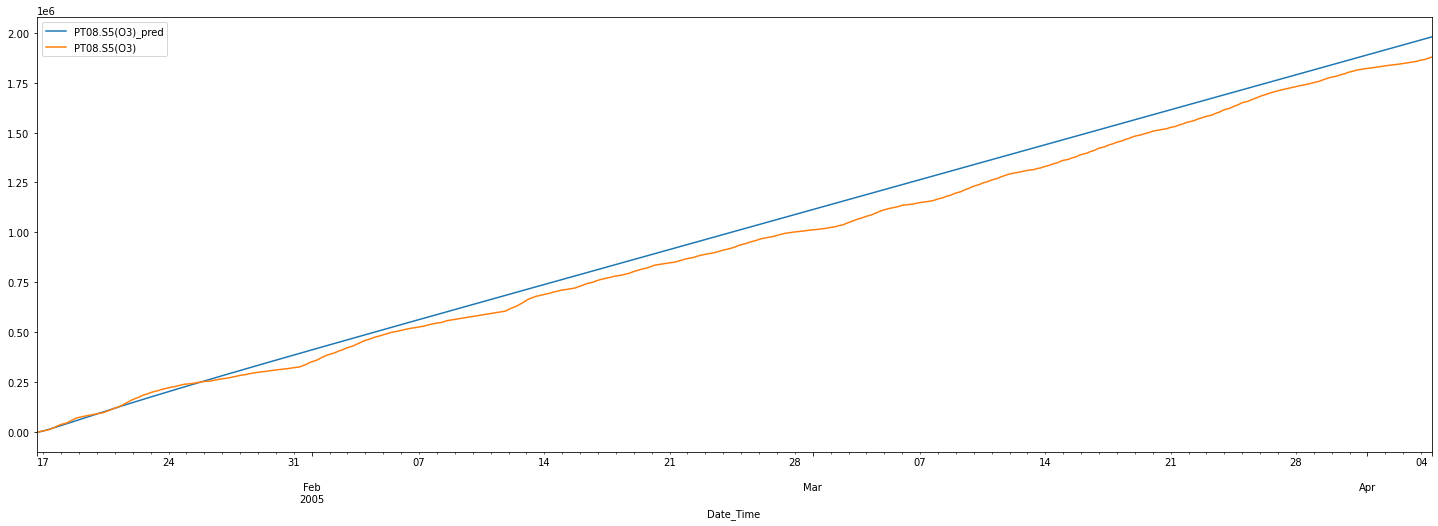

<Figure size 432x288 with 0 Axes>

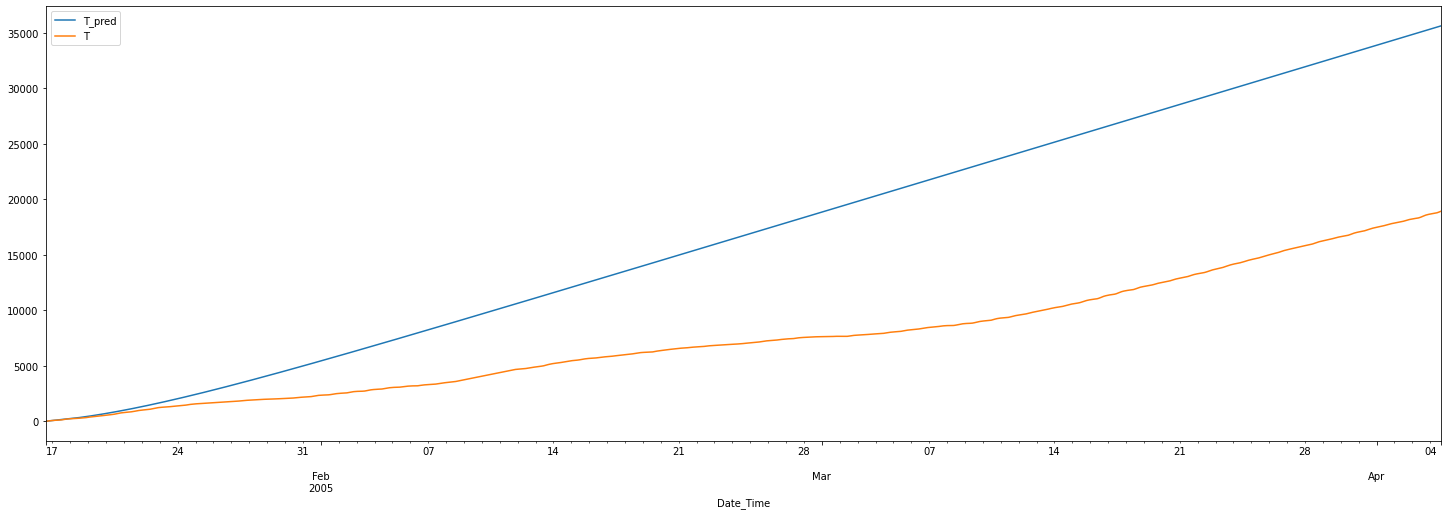

<Figure size 432x288 with 0 Axes>

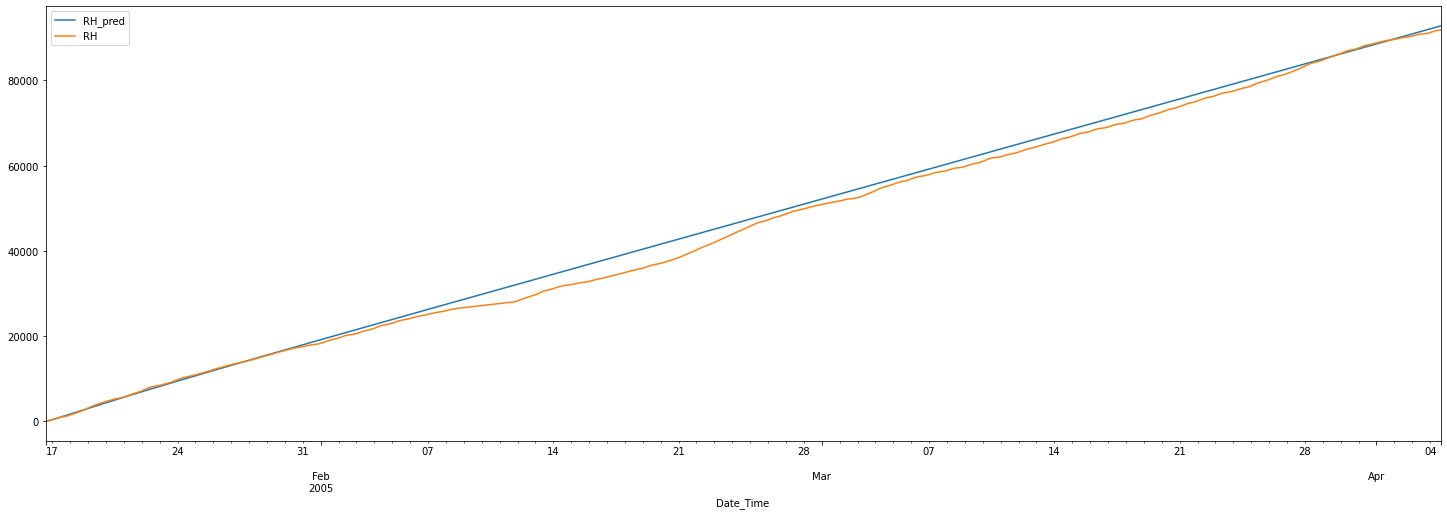

<Figure size 432x288 with 0 Axes>

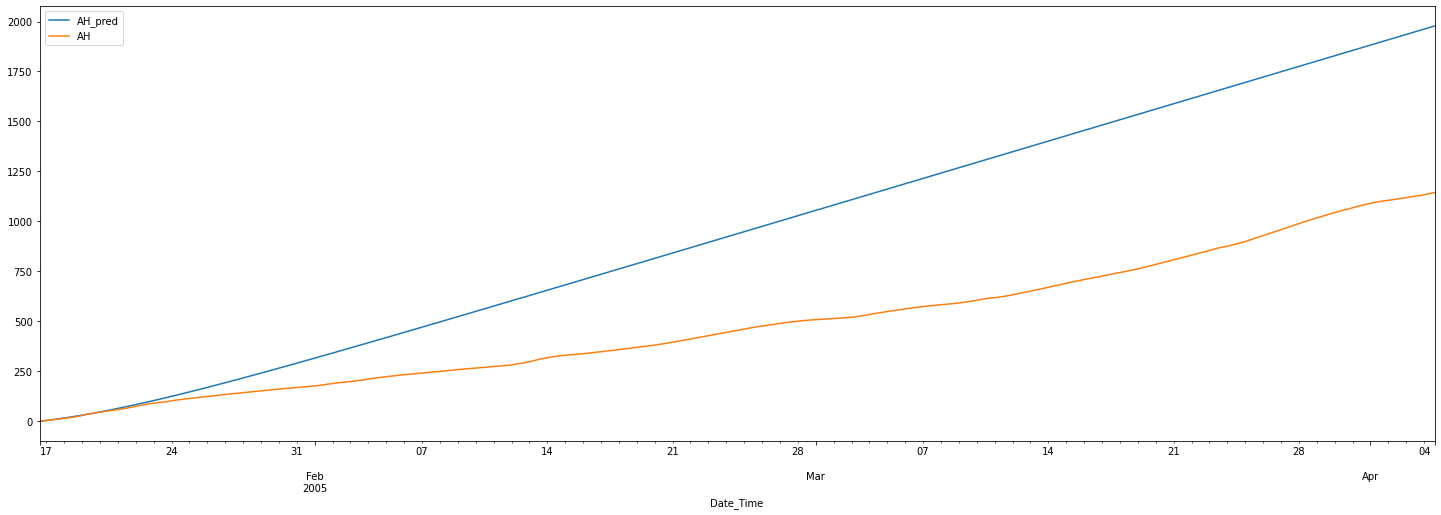

In [ ]:

def compare(predicted_col, valid_col):
  tmp_df = pd.concat([ pred_df_cum[[predicted_col]], valid_cum[[valid_col]]], axis = 1,)

  #tmp_df.head()

  plt.figure();

  tmp_df.plot(figsize=(25,8))

compare(columns[0]+'_pred',columns[0])
compare(columns[1]+'_pred',columns[1])
compare(columns[2]+'_pred',columns[2])
compare(columns[3]+'_pred',columns[3])
compare(columns[4]+'_pred',columns[4])
compare(columns[5]+'_pred',columns[5])
compare(columns[6]+'_pred',columns[6])
compare(columns[7]+'_pred',columns[7])
compare(columns[8]+'_pred',columns[8])
compare(columns[9]+'_pred',columns[9])
compare(columns[10]+'_pred',columns[10])
compare(columns[11]+'_pred',columns[11])
compare(columns[12]+'_pred',columns[12])

